To determine which physiochemical properties make a wine 'good' 

In [224]:
# import necessary library, models and tools
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns




from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


from sklearn.metrics import confusion_matrix, classification_report


import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings('ignore')

Importing Dataset and Data Information


In [225]:
wine = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [226]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

From this we can identify that this is a classification type model. Also we v=can take assemptiions as value above 6 is good and values below 6 is bad so we can convert the same into two class


In [227]:
# find the details of our dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [228]:
# this shows us that no data is missing in data set. still we cheque is ther any na present
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [229]:
# check data type pf our features
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From above infromation we can identify that no objest data type present in our DATAFRAME and we can procedd further

<AxesSubplot:xlabel='quality', ylabel='count'>

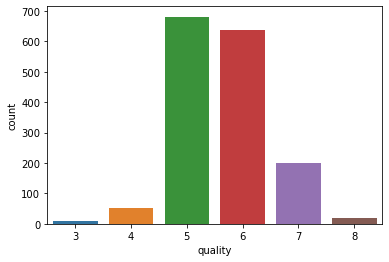

In [230]:
#Now we plot count flot for our label
sns.countplot(wine['quality'])

From this we can figure out quality 5 and 6 hev hign numbers

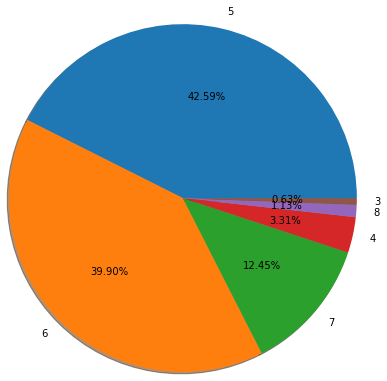

In [231]:

fig, ax = plt.subplots()
lab = '5','6','7','4','8','3'
ax.pie(wine['quality'].value_counts(),labels = lab,radius = 2, autopct = '%1.2f%%', shadow = True)

plt.show()

In [232]:
#now we can change the quality in to good or bad  
wine['quality']=np.where(wine['quality']<6,'bad','good')
wine['quality'].unique()

array(['bad', 'good'], dtype=object)

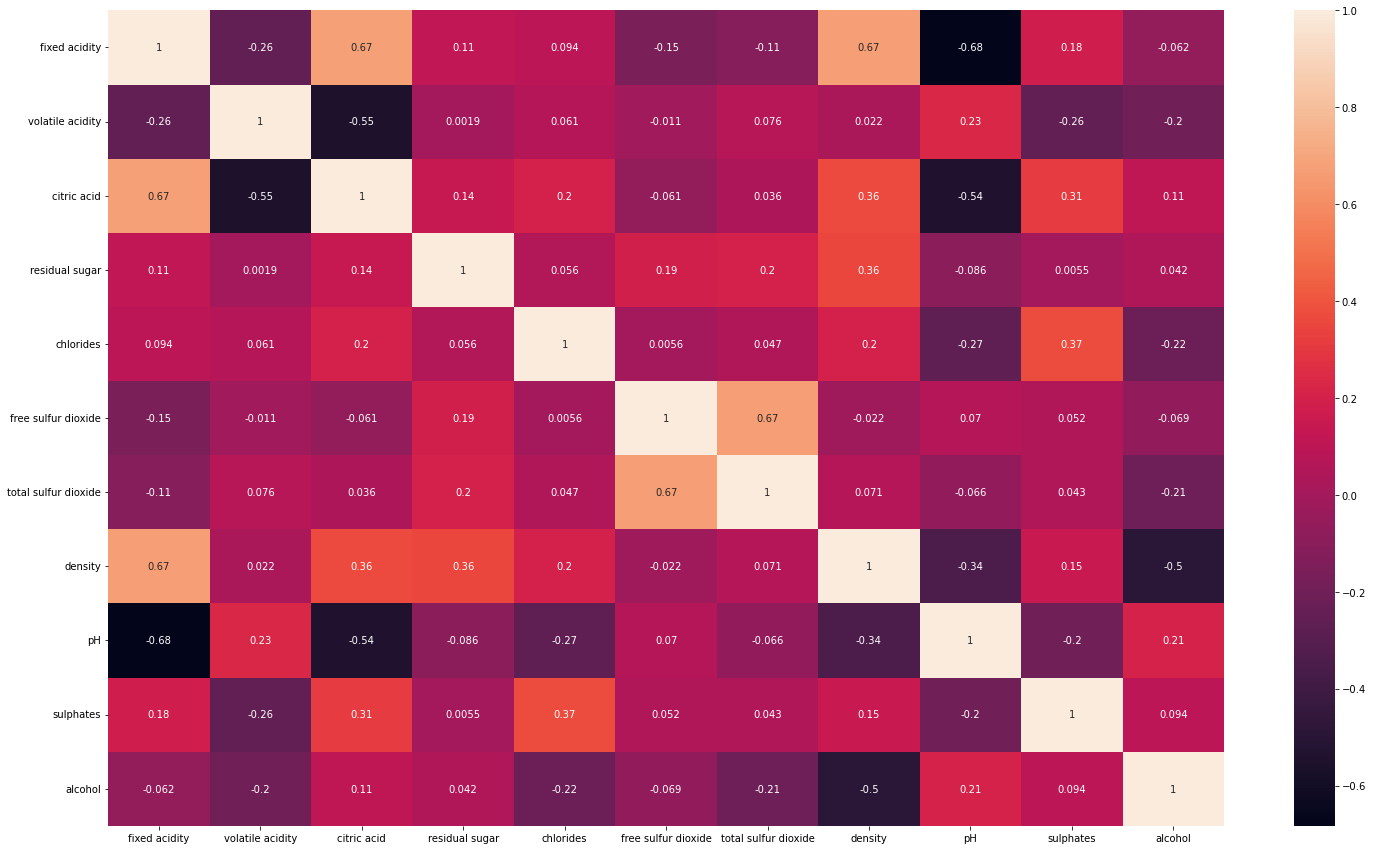

In [233]:
# Now check whether any corelation is present or not
plt.figure(figsize=(25,15))
sns.heatmap(wine.corr(),annot=True)
plt.show()

From thi we can identify that ther is not too much correlation between features

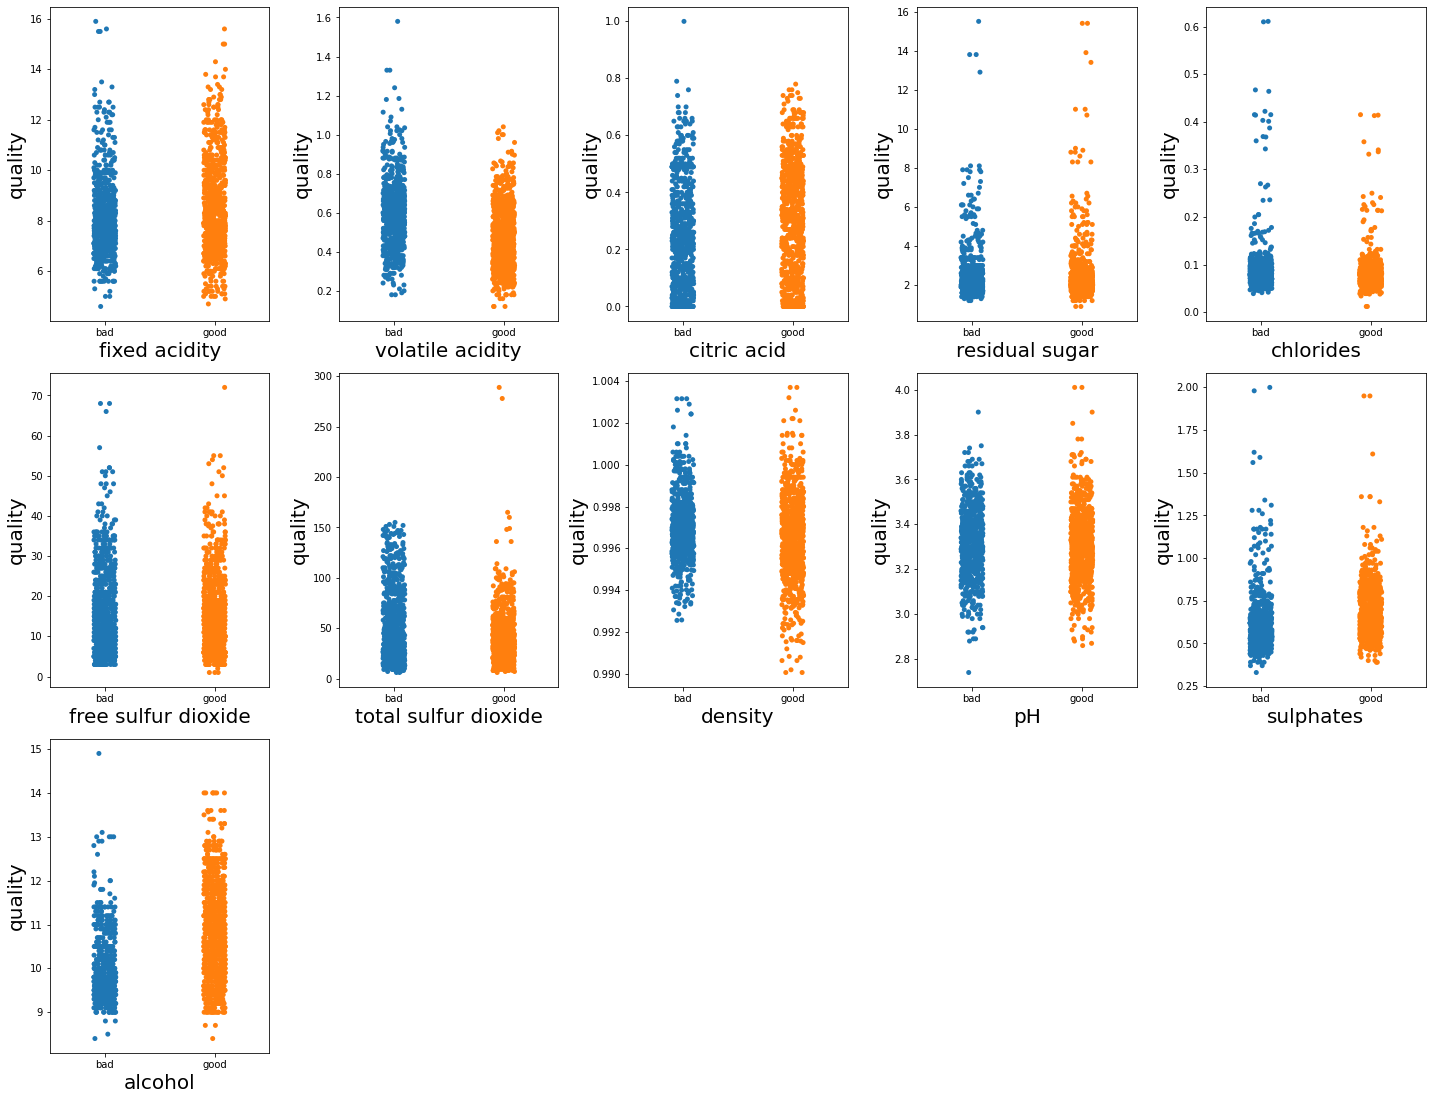

In [238]:
#interpret relationship between independent variables and labels
plt.figure(figsize = (20,25), facecolor = 'white')
plotnum = 1
x=wine.drop('quality',axis=1)
y=wine['quality']
for col in x:
    if plotnum<=12:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.ylabel('quality',fontsize = 20)
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

from this we can identify ph does not  have  that much affect.volatile acidity have -ve relation

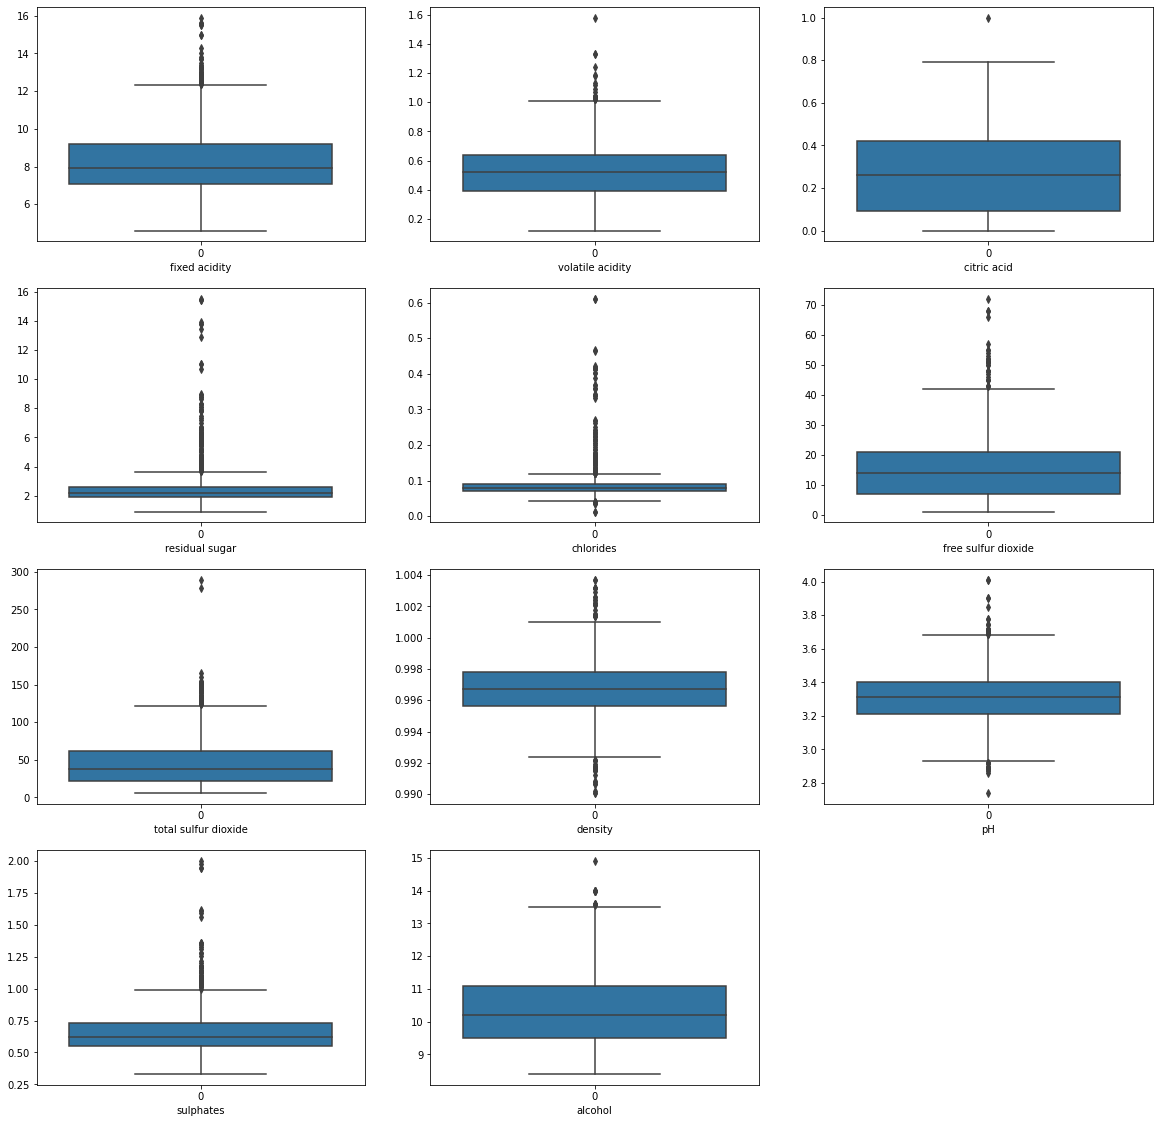

In [242]:
# now check the outliers present in our data using box plot
plt.figure(figsize=(20,25))
graph=1
for c in wine:
    if graph<=11:
        plt.subplot(5,3,graph)
        sns.boxplot(data=wine[c])
        plt.xlabel(c)
    graph+=1    
plt.show()

These images show that almost all features outliers arre present

In [266]:
x=wine.drop('quality',axis=1)#seperating features and label
y=wine['quality']

In [267]:
#Now we will check outliers using zscore

from scipy.stats import zscore

zs = np.abs(zscore(x))
zs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [268]:
x = x[(zscor <3).all(axis=1)] #taking threshold value as 3
print(x.shape)
y=y[(zscor<3).all(axis=1)]
print(y.shape)

(1545, 11)
(1545,)


In [269]:
#now check the percentage loss of data
print((1599-1545)/1599*100)

3.377110694183865


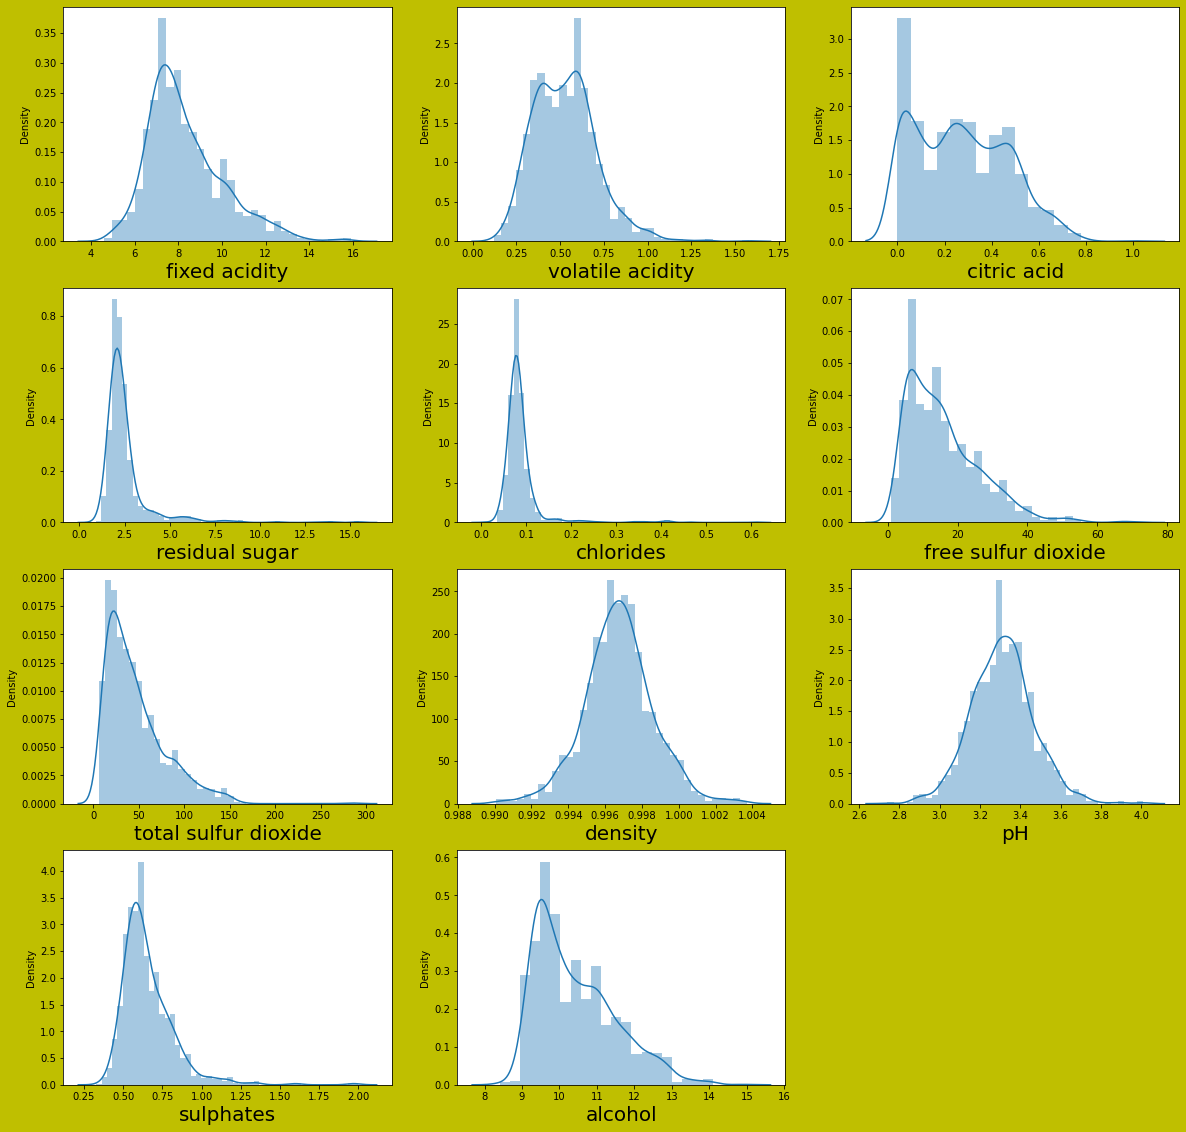

In [270]:
# now we will check skewness present in our data or not
plt.figure(figsize=(20,25),facecolor='y')
plno=1
for i in wine:
    if plno<=11:
        ax=plt.subplot(5,3,plno)
        sns.distplot(wine[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()


In [271]:
# from this figure it self we can find that newness were present in our dataframe. 

x.skew()

fixed acidity           1.000994
volatile acidity        0.692993
citric acid             0.293463
residual sugar          4.044626
chlorides               2.967165
free sulfur dioxide     1.240762
total sulfur dioxide    1.550380
density                 0.125182
pH                      0.101337
sulphates               1.454938
alcohol                 0.856148
dtype: float64

In [272]:

#as the skewness is very high for some features, we deal with that
sk=['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']
skew_df=x[sk].copy()
#1st we use log  transform to reduce skewness
for col in skew_df:
    skew_df[col]=np.log(skew_df[col])
    
skew_df.skew()



fixed acidity           0.443672
residual sugar          1.767435
chlorides               0.908739
free sulfur dioxide    -0.161774
total sulfur dioxide   -0.059055
sulphates               0.607671
alcohol                 0.658825
dtype: float64

now the skewness reduced, but we have to reduce further by using power tranform 

In [273]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='yeo-johnson')
x_new=pw.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

fixed acidity           0.011471
volatile acidity        0.002900
citric acid             0.016491
residual sugar          0.076513
chlorides              -0.102899
free sulfur dioxide    -0.007068
total sulfur dioxide   -0.001644
density                -0.005150
pH                      0.000091
sulphates               0.029988
alcohol                 0.117635
dtype: float64

In [283]:
x_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.446422,0.993812,-1.528526,-0.650147,-0.162861,-0.262833,-0.113802,0.575108,1.326924,-0.590825,-1.103638
1,-0.159581,1.767568,-1.528526,0.572780,0.915169,1.000824,0.866595,0.032396,-0.773764,0.436379,-0.517126
2,-0.159581,1.267767,-1.251887,0.151485,0.663918,0.202297,0.552647,0.141722,-0.356088,0.212763,-0.517126
3,1.514503,-1.568064,1.427471,-0.650147,-0.223335,0.394445,0.705765,0.682523,-1.055332,-0.392881,-0.517126
4,-0.446422,0.993812,-1.528526,-0.650147,-0.162861,-0.262833,-0.113802,0.575108,1.326924,-0.590825,-1.103638
...,...,...,...,...,...,...,...,...,...,...,...
1540,-1.499847,0.495735,-0.988703,-0.416522,0.573692,1.399269,0.256367,-1.025982,0.931123,-0.392881,0.290755
1541,-1.820937,0.224779,-0.861803,-0.018622,-1.124446,1.723847,0.469771,-0.901557,1.392411,0.947176,0.893946
1542,-1.398727,-0.003749,-0.676957,0.151485,-0.162861,1.239477,0.119137,-0.553702,0.731343,0.889389,0.738585
1543,-1.820937,0.726709,-0.737859,-0.416522,-0.223335,1.399269,0.256367,-0.704694,1.717823,0.641516,-0.026026


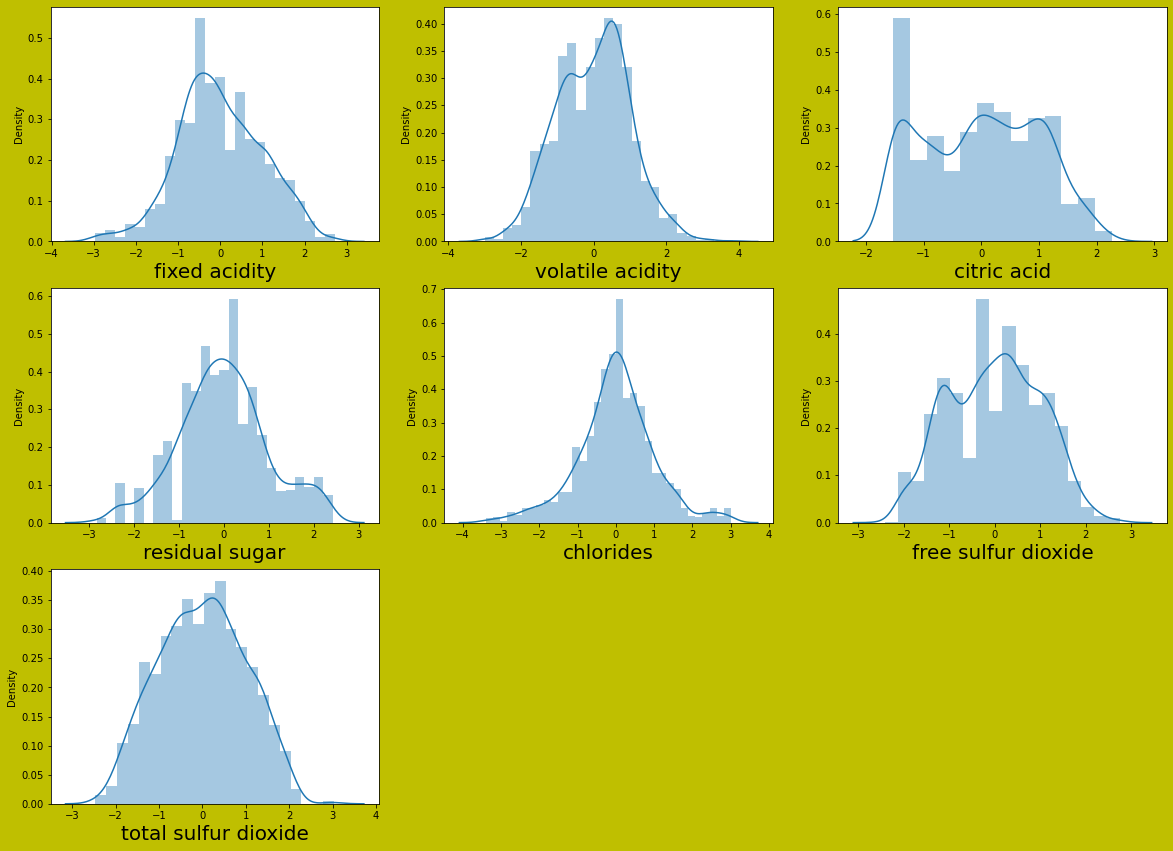

In [274]:
# we can again check the skeness by visualization
plt.figure(figsize=(20,25),facecolor='y')
plno=1
for i in x_new:
    if plno<=7:
        ax=plt.subplot(5,3,plno)
        sns.distplot(x_new[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

The images shows that the skewness have reduced 

In [289]:
x_new.shape

(1545, 11)

In [290]:
#Now we will satndardize our data using standardscalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x_new),columns=x_new.columns)
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.446422,0.993812,-1.528526,-0.650147,-0.162861,-0.262833,-0.113802,0.575194,1.326924,-0.590825,-1.103638
1,-0.159581,1.767568,-1.528526,0.572780,0.915169,1.000824,0.866595,0.032483,-0.773764,0.436379,-0.517126
2,-0.159581,1.267767,-1.251887,0.151485,0.663918,0.202297,0.552647,0.141808,-0.356088,0.212763,-0.517126
3,1.514503,-1.568064,1.427471,-0.650147,-0.223335,0.394445,0.705765,0.682609,-1.055332,-0.392881,-0.517126
4,-0.446422,0.993812,-1.528526,-0.650147,-0.162861,-0.262833,-0.113802,0.575194,1.326924,-0.590825,-1.103638
...,...,...,...,...,...,...,...,...,...,...,...
1540,-1.499847,0.495735,-0.988703,-0.416522,0.573692,1.399269,0.256367,-1.025896,0.931123,-0.392881,0.290755
1541,-1.820937,0.224779,-0.861803,-0.018622,-1.124446,1.723847,0.469771,-0.901471,1.392411,0.947176,0.893946
1542,-1.398727,-0.003749,-0.676957,0.151485,-0.162861,1.239477,0.119137,-0.553616,0.731343,0.889389,0.738585
1543,-1.820937,0.726709,-0.737859,-0.416522,-0.223335,1.399269,0.256367,-0.704608,1.717823,0.641516,-0.026026


#Now Encode the Label 


In [292]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 1])

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0
rf = RandomForestClassifier()
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .30, random_state=i)
    
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.8491379310344828 on Random State: 78


# Now split the data using this best random state and find the best model


In [297]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=93)

In [304]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       204
           1       0.83      0.78      0.80       260

    accuracy                           0.79       464
   macro avg       0.78      0.79      0.78       464
weighted avg       0.79      0.79      0.79       464



In [309]:
print(confusion_matrix(y_test,pred))

[[161  43]
 [ 56 204]]


Now We will import other model

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

#Decision Tree Algorithm

In [311]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7262931034482759
[[146  58]
 [ 69 191]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       204
           1       0.77      0.73      0.75       260

    accuracy                           0.73       464
   macro avg       0.72      0.73      0.72       464
weighted avg       0.73      0.73      0.73       464



#SVC

In [312]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7607758620689655
[[160  44]
 [ 67 193]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       204
           1       0.81      0.74      0.78       260

    accuracy                           0.76       464
   macro avg       0.76      0.76      0.76       464
weighted avg       0.77      0.76      0.76       464



In [313]:
#KNN
knn=KNN()

In [317]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.6961206896551724
[[137  67]
 [ 74 186]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       204
           1       0.74      0.72      0.73       260

    accuracy                           0.70       464
   macro avg       0.69      0.69      0.69       464
weighted avg       0.70      0.70      0.70       464



In [319]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7564655172413793
[[151  53]
 [ 60 200]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       204
           1       0.79      0.77      0.78       260

    accuracy                           0.76       464
   macro avg       0.75      0.75      0.75       464
weighted avg       0.76      0.76      0.76       464



Random forest classifier  have miximum accuracy,

In [320]:
# Now we will check Cross validation score
# Rain Forest Alogorithm
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Rain Forest Algorithm=",cvs)

Cross Validation score for Rain Forest Algorithm= 0.7307443365695793


In [321]:
cvs=cross_val_score(dt,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Decision Tree Algorithm=",cvs)

Cross Validation score for Decision Tree Algorithm= 0.6485436893203884


In [322]:
cvs=cross_val_score(sv,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Support Vector Machine ClassifierAlgorithm=",cvs)

Cross Validation score for Support Vector Machine ClassifierAlgorithm= 0.7275080906148869


In [323]:
cvs=cross_val_score(knn,x_scaled,y,cv=5).mean()
print ("Cross Validation score for KNearest Alogorithm=",cvs)


Cross Validation score for KNearest Alogorithm= 0.6867313915857605


Here also the rain forest alogorithm have heighest value so we will select the same for futher processing

# Now are going to tune or model using Gridsearch cv

In [331]:
rf=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
prams={ 'criterion':['gini','entropy'],
       'max_depth':[10,15,20],
        'max_features' : ["auto", "sqrt", "log2"]
    
        }
gcv=GridSearchCV(RandomForestClassifier(),prams,cv=5)


In [333]:
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [335]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto'}

In [336]:
rt=RandomForestClassifier(criterion= 'entropy', max_depth= 15, max_features= 'auto')

In [337]:
rt.fit(x_train,y_train)
rt.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.7564655172413793
[[151  53]
 [ 60 200]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       204
           1       0.79      0.77      0.78       260

    accuracy                           0.76       464
   macro avg       0.75      0.75      0.75       464
weighted avg       0.76      0.76      0.76       464



# Now Saving the model

In [339]:
import joblib
joblib.dump(rt,"Best_Wine.pkl")

['Best_Wine.pkl']